# SIMULACIÓN | LABORATORIO 3



### CONTENIDOS
1. Histogramas y Distribución empírica
2. Estimadores de máxima verosimilitud
3. Test de bondad de ajuste 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from IPython.display import display
import ipywidgets as widgets
from IPython.core.pylabtools import figsize
def ecdf(data):
    """ Calcula la distribución empírica acumulada"""
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)
datos = stats.binom.rvs(10,0.5,size=1000)

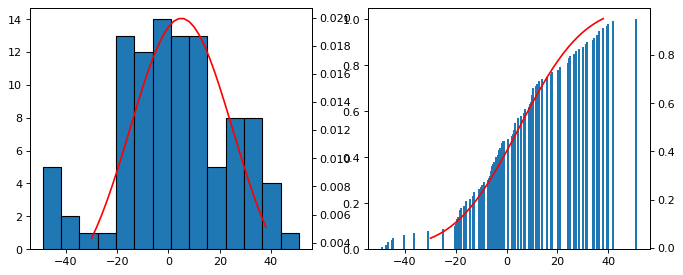

In [3]:
## Simularemos datos de una distribución normal y luego graficaremos su
## función de distribución empírica y la distribución teórica
mu=5
sigma=20
datos = stats.norm.rvs(loc=mu, scale=sigma, size=100)

fig, axs = plt.subplots(1, 2,figsize=(10, 4), dpi=80)

axs[0].hist(datos, edgecolor = 'black',
         bins = int(70/5))
ax1 = axs[0].twinx()
vec = range(-30,40,2)
##
dvec = []
for i in vec:
    dvec.append(stats.norm.pdf(x=i, loc=mu, scale=sigma))
ax1.plot(vec,dvec,color='red')

x,cum_norm = ecdf(datos)
axs[1].bar(x,cum_norm)
## probabilidad teórica
ax2 = axs[1].twinx()
vec = range(-30,40,2)
##
pvec = []
for i in vec:
    pvec.append(stats.norm.cdf(x=i, loc=mu, scale=sigma))
ax2.plot(vec,pvec,color='red')
plt.draw()


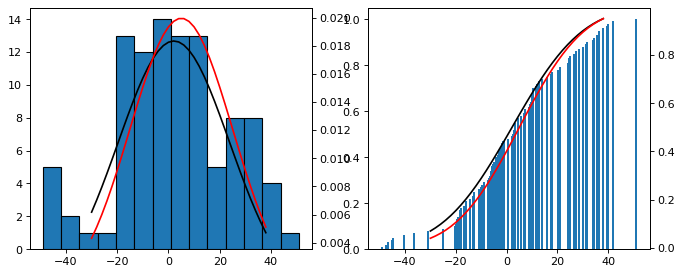

In [4]:
## Calculemos ahora los estimadores máximo verosímiles y veamos como quedan las curvas
mu0,sigma0 = stats.norm.fit(datos)

fig, axs = plt.subplots(1, 2,figsize=(10, 4), dpi=80)

axs[0].hist(datos, edgecolor = 'black',
         bins = int(70/5))
ax1 = axs[0].twinx()
vec = range(-30,40,2)
##
dvec0 = []
for i in vec:
    dvec0.append(stats.norm.pdf(x=i, loc=mu0, scale=sigma0))
    
ax1.plot(vec,dvec0,color='black')
ax1.plot(vec,dvec,color='red')

axs[1].bar(x,cum_norm)
## probabilidad teórica
ax2 = axs[1].twinx()
vec = range(-30,40,2)
##
pvec0 = []
for i in vec:
    pvec0.append(stats.norm.cdf(x=i, loc=mu0, scale=sigma0))
ax2.plot(vec,pvec0,color='black')   
ax2.plot(vec,pvec,color='red')
plt.draw()


In [5]:
## Utilicemos ahora el test de K-S para probar el ajuste de datos
## respecto de la distribución teórica?
stats.kstest(datos, 'norm')

KstestResult(statistic=0.5089907120005233, pvalue=1.5206322642537498e-24)

In [6]:
## Utilicemos ahora el test de K-S para probar el ajuste de datos
## respecto de la distribución teórica?
stats.kstest(datos, 'norm', args=(mu, sigma))

KstestResult(statistic=0.09470326624076536, pvalue=0.3112718127244012)

<p>El test de K-S para los datos originales nos da un <b>pvalue</b> cercano a <b> 0.8865930819583845</b></p>
<p>Esto nos indica que si plantearamos una hipótesis nula H0: Los datos distribuyen normal y una hipótesis alternativa H1: No distribuye normal. Entonces para este p-value no podemos rechazar H0.</p>

In [7]:
## Respecto de la distribución con los parámetros MV?
stats.kstest(datos, 'norm', args=(mu0, sigma0))

KstestResult(statistic=0.06292947746078456, pvalue=0.799676152832443)

<p>En comparación al anterior, tampoco podríamos rechazar la hipótesis nula (H0), pero con los datos ajustados parece un poco más alejado de ser lo más certero, aunque el p tendría que estar bajo 0.05 para rechazar H0.</p>

In [8]:
## Comparando con una nueva muestra extraida de la distribución con los parámetros MV?
datos2 = stats.norm.rvs(loc=mu0, scale= sigma0,size=1000)
stats.kstest(datos, datos2)

KstestResult(statistic=0.068, pvalue=0.7736964645055228)

<p>Nuevamente no podríamos rechazar H0 y este parece ser el peor caso de los 3 en cuánto a precisión.</p>

#### Ejercicio1: 
(i) interprete los resultados obtenidos con el test de k-s en los distintos casos<br>
Repita el ejercicio con:

(ii) una muestra de datos simulados de una v.a. discreta de su elección

(iii) una muestra de datos simulados de una v.a. continua de su elección (distinta de la normal)

### Respuesta 1.i
<p>(Los resultados se interpretan una vez son calculados)</p>

### Respuesta 1.ii

### Generamos los datos (Los datos binomiales son una distribución discreta)

In [9]:
size=100 ; n=50 ; p=0.5 ;
datos_binom = stats.binom.rvs(n=n,p=p,size=size)

### Graficaremos su función de distribución empírica y la distribución teórica

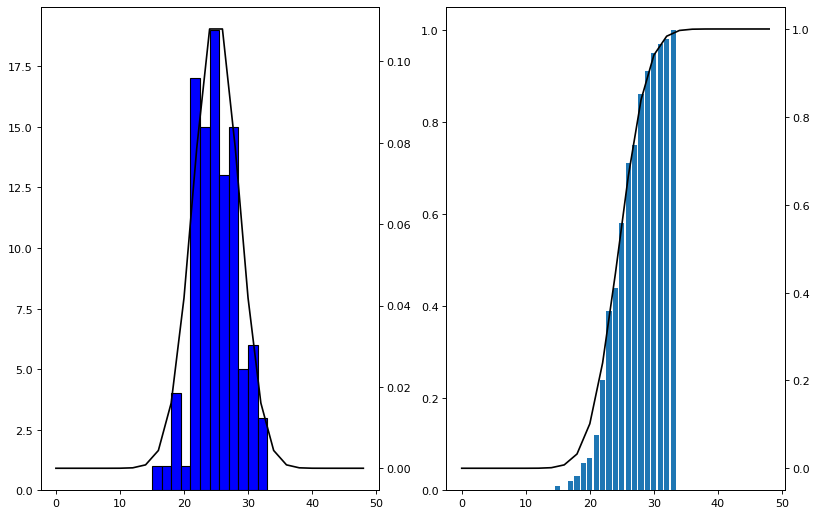

In [10]:
# # # # # # # # 
# Histograma datos binomiales con su probabilidad teórica
# # # # # # # #
binwidth = 4
fig, ax = plt.subplots(1, 2, figsize=(12, 8), dpi=80)
ax[0].hist(datos_binom, color = 'blue', edgecolor = 'black', bins = int(n/binwidth))

## probabilidad teórica
ax[0] = ax[0].twinx()
vec = range(0,n,2)

dvec = []
for i in vec:
    dvec.append(stats.binom.pmf(k=i, n=n, p=p))
ax[0].plot(vec,dvec, color = "black")


# # # # # # # # # # # # # # # # 
# Distribución empírica acumulada para datos binomiales
# # # # # # # # # # # # # # # # 
x,cum_bin = ecdf(datos_binom)
ax[1].bar(x,cum_bin)

## probabilidad teórica
ax[1] = ax[1].twinx()
vec = range(0,n,2)

pvec = []
for i in vec:
    pvec.append(stats.binom.cdf(k=i, n=n, p=p))
ax[1].plot(vec,pvec, color = "black");

### Calculamos ahora los estimadores máximo verosímiles y graficamos

In [11]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fit.html#scipy.stats.fit
# Para hacer un fit de los datos_binom consideramos:

# 1) Una distribución: En este caso binomial
dist = stats.binom

# 2) Pasamos 3 parámetros:
#    - distribución: Tipo de distribución
#    - datos: Datos a ajustar
#    - bounds: Límites de los parámetros n y p en forma de tupla, en este caso (n,n) para n y (0,1) para p. 

res = stats.fit(dist, datos_binom, [(n,n), (0,1)])
res.params

AttributeError: module 'scipy.stats' has no attribute 'fit'

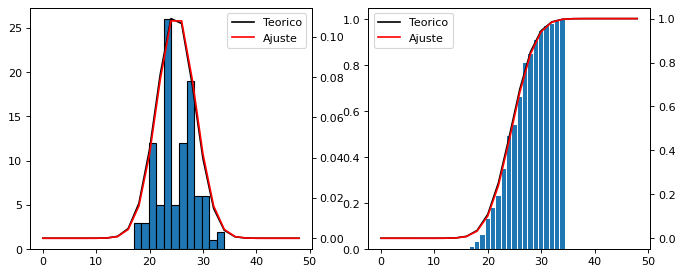

In [ ]:
# # # # # # # # # # # # # # # # # # # # # # # # 
# Histograma datos binomiales con versión ajustada
# # # # # # # # # # # # # # # # # # # # # # # # 

# destruct de los parámetros 'fit' de la distribución
n0, p0, loc0 = res.params
n0 = int(n0) # n0 es un float, lo pasamos a int

fig, axs = plt.subplots(1, 2,figsize=(10, 4), dpi=80)

axs[0].hist(datos_binom, edgecolor = 'black', #-- Esto se adoptó a " datos_binom ".
         bins = int(n/binwidth))
ax1 = axs[0].twinx()
vec = range(0,n,2)


dvec0 = []
for i in vec:
    dvec0.append(stats.binom.pmf(k=i, n=n0, p=p0)) #-- Esto se adoptó a " .binom.pdf "; Al igual que los parámetros.
    
ax1.plot(vec,dvec0,color='black')
ax1.plot(vec,dvec,color='red')
ax1.legend(['Teorico', 'Ajuste'])


# # # # # # # # # # # # # # # # # # # # # 
#  Distribución acumulada para datos binomiales con versión ajustada
# # # # # # # # # # # # # # # # # # # # # 

axs[1].bar(x,cum_bin) #-- Esto se adoptó a " cum_bin ".
## probabilidad teórica
ax2 = axs[1].twinx()
vec = range(0,n,2)
##
pvec0 = []
for i in vec:
    pvec0.append(stats.binom.cdf(k=i, n=n0, p=p0)) # Esto se adoptó a " .binom.cdf " ; Al igual que los parámetros.
ax2.plot(vec,pvec0,color='black')
ax2.plot(vec,pvec,color='red')
ax2.legend(['Teorico', 'Ajuste'])
plt.draw()


### Utilicemos ahora el test de K-S para probar el ajuste de datos, datos iniciales n y p

In [ ]:
print(f"n: {n}, p: {p}")
stats.kstest(datos_binom, 'binom', args=(n, p))

n: 50, p: 0.5


KstestResult(statistic=0.12409448311731719, pvalue=0.0842838350109757)

### Utilicemos ahora el test de K-S para probar el ajuste de datos, respecto de la MV

In [ ]:
print(f"n0: {n0}, p0: {p0}")
stats.kstest(datos_binom, 'binom', args=(n0, p0))

n0: 50, p0: 0.4971999955460431


KstestResult(statistic=0.13847904410487366, pvalue=0.03905376307323083)

### Comparando con una nueva muestra extraida de la distribución con los parámetros iniciales n y p

In [ ]:
random_datos_binom_1 = stats.binom.rvs(n=n, p=p, size=size)
stats.kstest(datos_binom, random_datos_binom_1)

KstestResult(statistic=0.05, pvalue=0.9996892272702655)

### Comparando con una nueva muestra extraida de la distribución con los parámetros MV

In [ ]:
random_datos_binom_2 = stats.binom.rvs(n=n0, p=p0, size=size)
stats.kstest(datos_binom, random_datos_binom_2)

KstestResult(statistic=0.11, pvalue=0.5830090612540064)

### Respuesta 1.ii test K-S
<p>Nuevamente si plantearamos una hipótesis nula H0: Los datos distribuyen binomial, y un H1: Los datos no distribuyen binomial. Tendríamos 4 experimentos:</p>
<ul>
<li><b>(n,p) originales</b>, pvalue=0.3558976949995666</li>
<li><b>(n0,p0) ajustados</b> pvalue=0.2370035346061089</li>
<li><b>(n,p) originales vs data generada con (n,p)</b> pvalue=0.9084105017744525</li>
<li><b>(n,p) originales vs data generada con (n0,p0)</b> pvalue=0.9684099261397212</li>
</ul>
<small>Los datos p-value están propensos a cambios</small>
<p>Como resultado, no podríamos descartar la hipótesis nula H0 para este caso, con un alpha/confianza del 80,85,90 y 95%. Con el 75% podríamos tener discrepancias con los valores de n0 y p0, ya que el p-value está bajo 0.25, por lo que en ese caso, con 75% confianza, se podría rechazar la hipótesis H0. Pero es un valor poco recomendable para testeos, una confianza adecuada sería del 95% en la mayoría de casos, y nuevamente, si fuese 95% de confianza no se podría rechazar.</p>

### Respuesta 1.iii

### Generamos los datos (Los datos t-student son una distribución continua)

In [ ]:
size=500 ; df = 5; loc = 0; scale = 1;
datos_t =stats.t.rvs(df=df, loc=loc, scale=scale, size=size)

### Graficaremos su función de distribución empírica y la distribución teórica

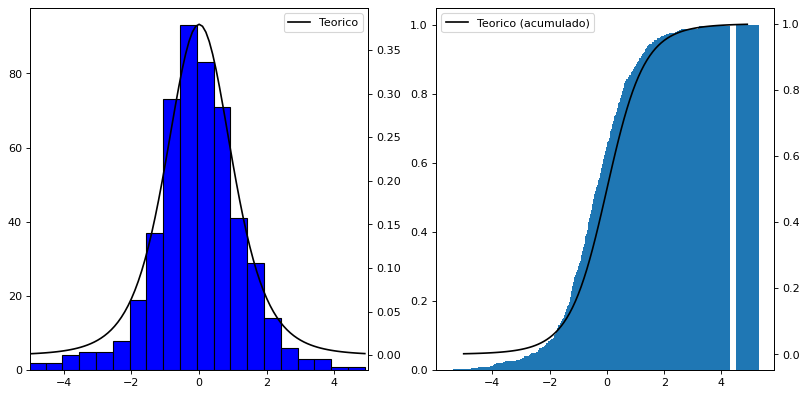

In [ ]:
# graficamos
fig, ax = plt.subplots(1, 2, figsize=(12, 6), dpi=80)
ax[0].hist(datos_t, color = 'blue', edgecolor = 'black', bins = int(size/25))

ax[0].set_xlim(-5,5)
vec = np.arange(-5,5,0.1)

## probabilidad teórica
ax2 = ax[0].twinx()
dvec = []
for i in vec:
    dvec.append(stats.t.pdf(x=i, df=df))
ax2.plot(vec,dvec, color='black')

ax2.legend(['Teorico'])
##
# Acumulado
x, cum_t = ecdf(datos_t)
ax[1].bar(x, cum_t)

## probabilidad teórica
vec = np.arange(-5,5,0.1)
ax2 = ax[1].twinx()

pvec = []
for i in vec:
    pvec.append(stats.t.cdf(x=i, df=df))
ax2.plot(vec,pvec, color='black')
ax2.legend(['Teorico (acumulado)'])

plt.draw()


### Calculamos y graficamos versión ajustada de la distribución

In [ ]:
# una forma de hacerlo es con la función 'fit' y con parametros
res = stats.fit(stats.t, datos_t, [(0,10)])
print(f"Utilizando stats.fit: {res.params}")

df0, loc0, scale0 = stats.t.fit(datos_t)
print(f"Utilizando stats.t.fit: {stats.t.fit(datos_t)}")

Utilizando stats.fit: FitParams(df=4.690206373758835, loc=0.0, scale=1.0)
Utilizando stats.t.fit: (4.894390453469757, -0.01818182318963977, 1.0155767579278643)


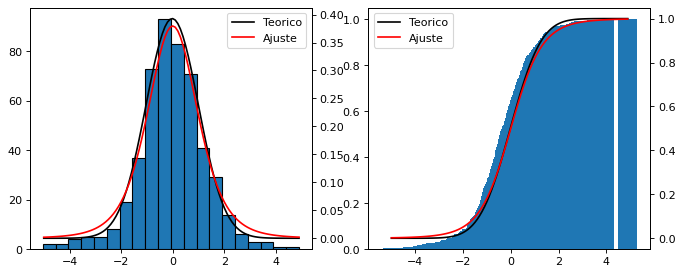

In [ ]:

fig, axs = plt.subplots(1, 2,figsize=(10, 4), dpi=80)

axs[0].hist(datos_t, edgecolor = 'black',
         bins = int(size/25))
ax1 = axs[0].twinx()
vec = np.arange(-5,5,0.1)
##
dvec0 = []
for i in vec:
    dvec0.append(stats.norm.pdf(x=i, loc=loc0, scale=scale0))
    
ax1.plot(vec,dvec0,color='black')
ax1.plot(vec,dvec,color='red')
ax1.legend(['Teorico', 'Ajuste'])

axs[1].bar(x,cum_t)
## probabilidad teórica
ax2 = axs[1].twinx()

vec = np.arange(-5,5,0.1)
##
pvec0 = []
for i in vec:
    pvec0.append(stats.norm.cdf(x=i, loc=loc0, scale=scale0))
ax2.plot(vec,pvec0,color='black')   
ax2.plot(vec,pvec,color='red')
ax2.legend(['Teorico', 'Ajuste'])
plt.draw()

### Utilicemos ahora el test de K-S para probar el ajuste de datos, datos iniciales df, loc y scale

In [ ]:
print(f"df: {df}, loc: {loc}, scale: {scale}")
stats.kstest(datos_t, 't', args=(df, loc, scale))

df: 5, loc: 0, scale: 1


KstestResult(statistic=0.02423963969746007, pvalue=0.9235841891632053)

### Utilicemos ahora el test de K-S para probar el ajuste de datos, respecto MV

In [ ]:
print(f"df0: {df0}, loc0: {loc0}, scale0: {scale0}")
stats.kstest(datos_t, 't', args=(df0, loc0, scale0))

df0: 4.894390453469757, loc0: -0.01818182318963977, scale0: 1.0155767579278643


KstestResult(statistic=0.017006051554434354, pvalue=0.9982602958122038)

### Comparando con una nueva muestra extraida de la distribución con los parámetros iniciales df, loc y scale

In [ ]:
random_datos_t_1 = stats.t.rvs(df=df, loc=loc, scale=scale, size=size)
stats.kstest(datos_t, random_datos_t_1)

KstestResult(statistic=0.036, pvalue=0.9026912216773312)

### Comparando con una nueva muestra extraida de la distribución respecto a MV

In [ ]:
random_datos_t_2 = stats.t.rvs(df=df0, loc=loc0, scale=scale0, size=size)
stats.kstest(datos_t, random_datos_t_2)

KstestResult(statistic=0.036, pvalue=0.9026912216773312)

### Respuesta 1.iii test K-S
<p>Nuevamente si plantearamos una hipótesis nula H0: Los datos distribuyen t-student, y un H1: Los datos no distribuyen t-student. Tendríamos 4 experimentos:</p>
<ul>
<li><b>(df,loc,scale) originales</b>, pvalue=0.8447080476475326</li>
<li><b>(df0,loc0,scale0) ajustados</b> pvalue=0.9771587405076899</li>
<li><b>(df,loc,scale) originales vs data generada con (df,loc,scale)</b> pvalue=0.9026912216773312</li>
<li><b>(df,loc,scale) originales vs data generada con (df0,loc0,scale0)</b> 0.3699050405997647</li>
</ul>
<small>Los datos p-value están propensos a cambios</small>
<p>Obtendríamos el mismo resultado que antes, no podemos rechazar H0. Como dato relevante respecto a los demás ejercicios, en este caso si presentamos una mejoría para <b>p-value</b> desde los datos originales (df,loc,scale) y los datos ajustados (df0,loc0,scale0), donde el valor que más cambia son df (grados de libertad).</p>
<p>Para que la hipótesis sea rechazada el p-value de los 4 experimentos, debería ser menor a 0.05 o 0.10 (95% o 90% confianza), aunque eso dependerá del criterio con el que se analice. Al no estar bajo esos valores, no podemos rechazar o afirmar H0, solo estamos seguros de que no lo podemos descartar.</p>

### Inicio pregunta 2

In [132]:
## Analizaremos que ocurre con datos reales
from datetime import datetime, timedelta
datos = pd.read_csv("grandesSismos.csv")
datos.head()



,Fecha_local,Fecha_local1,Hora_local,Latitud,Longitud,Magnitud_Ms
0,08-02-1570,08-02-1570,9:00,-36.8,-73.00,8.3
1,17-03-1575,17-03-1575,10:00,-33.4,-70.60,7.3
2,16-12-1575,16-12-1575,14:30,-39.8,-73.20,8.5
3,24-11-1604,24-11-1604,12:30,-18.5,-70.40,8.5
4,16-09-1615,16-09-1615,23:30,-18.5,-70.35,8.8


In [13]:
vec1 = datos['Fecha_local']
dtpo = []
ind = list(range(112))
for i in ind:
    fecha1 = datetime.strptime(vec1[i], '%d-%m-%Y')
    fecha2 = datetime.strptime(vec1[i+1], '%d-%m-%Y')
    num = fecha2-fecha1
    num = num/timedelta(days=1)
    dtpo.append(num)
    

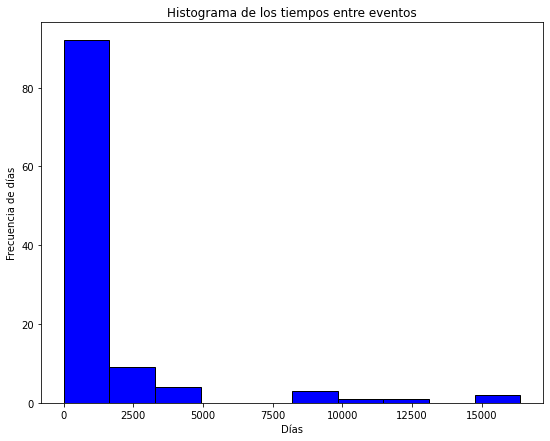

In [14]:
figsize(9, 7)

# Hacer histograma usando matplotlib, los bins deben ser enteros

plt.hist(dtpo, color = 'blue', edgecolor = 'black')

# Agrega texto
plt.title('Histograma de los tiempos entre eventos')
plt.xlabel('Días'); plt.ylabel('Frecuencia de días');

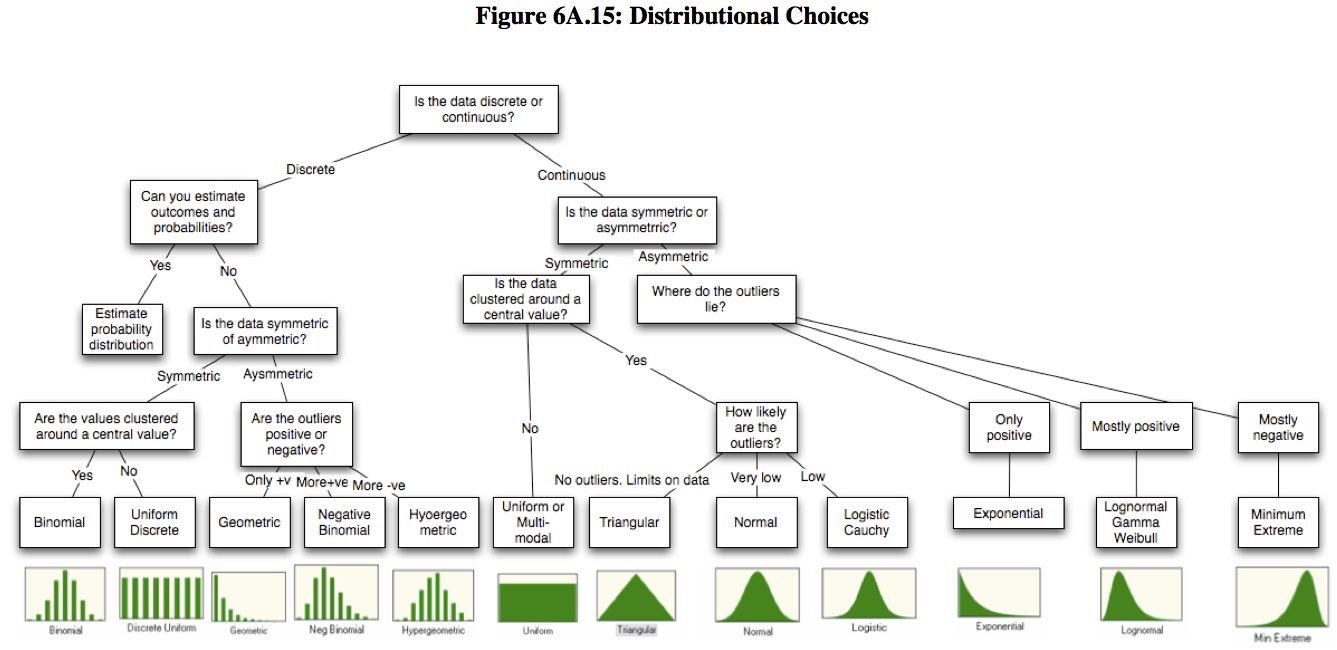

(0.0, 1457.3125)


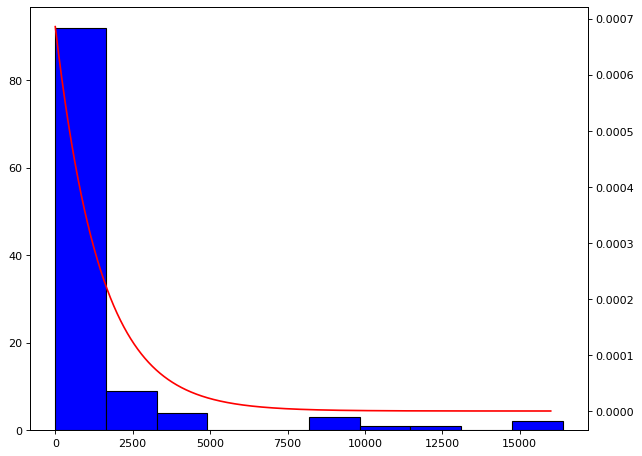

In [15]:
## ajuste de distribución exponencial considerando Estimadores de MV
fig, ax = plt.subplots(1, 1,figsize=(9,7), dpi=80)

ax.hist(dtpo, color = 'blue', edgecolor = 'black')
ax2 = ax.twinx()
args = stats.expon.fit(dtpo)
print(args)

vec = list(range(16000))

pvec = []
for i in vec:
    pvec.append(stats.expon.pdf(x=i,scale=args[1],loc=args[0]))
    
ax2.plot(vec,pvec, color='red')

plt.draw()


In [16]:
datos2 = stats.expon.rvs(*args,size=114)

stats.kstest(dtpo, datos2)

KstestResult(statistic=0.2658208020050125, pvalue=0.0004982227137492473)

In [17]:
#bloque de codigo para ver como son los datos
datos3 = datos
annos = []
for indx in datos3['Fecha_local']:
    annos.append(indx[6:10])
# by_years = datos.sort_values('Fecha_local')
# anno = by_years['Fecha_local'][2][6:10]
# print(anno)
annos.sort()
print(annos) #Nos damos cuenta que hay años que faltan
minimo = min(annos)
maximo = max(annos)
print(maximo)
print(minimo)
#Son 450 años de diferencia 



['1570', '1575', '1575', '1604', '1615', '1647', '1657', '1681', '1687', '1730', '1737', '1751', '1796', '1819', '1822', '1829', '1831', '1833', '1835', '1837', '1847', '1849', '1850', '1851', '1859', '1868', '1869', '1871', '1877', '1878', '1879', '1880', '1906', '1909', '1910', '1911', '1914', '1917', '1918', '1918', '1919', '1919', '1920', '1922', '1922', '1923', '1925', '1926', '1927', '1928', '1928', '1929', '1931', '1933', '1936', '1936', '1939', '1939', '1940', '1942', '1943', '1943', '1943', '1945', '1946', '1949', '1949', '1949', '1949', '1949', '1950', '1950', '1953', '1953', '1954', '1955', '1956', '1956', '1957', '1959', '1960', '1960', '1960', '1960', '1960', '1961', '1962', '1962', '1965', '1965', '1966', '1967', '1967', '1971', '1971', '1974', '1975', '1976', '1978', '1981', '1983', '1985', '1985', '1987', '1987', '1995', '1997', '2005', '2007', '2010', '2014', '2015', '2016', '2020']
2020
1570


#### Ejercicio 2:

(i) Interprete el resultado. ¿Qué otros modelos es razonable considerar? ¿Qué filtro en los datos podría mejorar el ajuste?<br>
 R i.1): Se puede considerar también el lognormal gamma weibull, ya que nos da una mayor libertad a la hora de analizar los datos, ya que podemos incluir probabilidades crecientes o decrecientes, que a la hora de analizar los sismos en distintos tiempos, estos pueden variar mucho, habiendo más o menos de ellos, dando más elasticidad al análisis.
fuente: https://reliabilityweb.com/sp/articles/entry/distribucion-weibull<br>
 R i.2) Para los filtros, podemos observar gracias a los experimentos en el bloque de codigo anterior que las fechas son muy variadas, donde entre el año mayor y el menor hay 450 años de diferencia, así mismo hay años que no están presentes y pueden incurrir en errores para el análisis. También se ve que estos sismos ocurren en distintos lugares, por lo que se podrían elegir localidades y hacer los análisis en ellas mismas dentro de los años.


(ii) Desarrolle alguno de los análisis propuestos en (i). Comente sus resultados.<br>
    R: vamos a ordenar por localidad, acotando la latitud y longitud, donde usamos una latitud entre -34>= lat <= -30 y longitud entre -73>= long <= -70, como resultado, vemos que el ajuste realizado empeoró los resultados, sin embargo, como p es mayor a 0.05 podemos decir que se acepta la hipótesis nula. Para un proximo experimento se pueden acotar los años y eliminar los sismo más antiguos, esto puede mejorar los resultados ya que al ser de fechas tan antiguas pueden incluir errores

In [18]:
# #Ordenamos desde latitud = -30 hasta -34, y longitud desde -70 a -73

datos4 = datos3
for i in range(114):
    lat = datos3['Latitud'][i]
    long = datos4['Longitud'][i]
    if(lat>=-30 or lat<=-36):
        if(long>=-70 or long<=-73):
            datos4 = datos4.drop(i,axis=0)

print(len(datos4))
datos4


68


,Fecha_local,Fecha_local1,Hora_local,Latitud,Longitud,Magnitud_Ms
1,17-03-1575,17-03-1575,10:00,-33.400,-70.600,7.3
3,24-11-1604,24-11-1604,12:30,-18.500,-70.400,8.5
4,16-09-1615,16-09-1615,23:30,-18.500,-70.350,8.8
5,13-05-1647,13-05-1647,22:30,-35.000,-72.000,8.5
7,10-03-1681,10-03-1681,0:00,-18.500,-70.350,7.3
...,...,...,...,...,...,...
106,14-10-1997,14-10-1997,22:03,-30.773,-71.315,7.1
108,14-11-2007,14-11-2007,12:40,-22.314,-70.078,7.5
110,01-04-2014,01-04-2014,20:46,-19.572,-70.908,8.2
111,16-09-2015,16-09-2015,19:54,-31.553,-71.864,8.4


In [19]:
datos4.reset_index(inplace=True)
vec1 = datos4['Fecha_local']
dtpo2 = []
ind = list(range(67))

for i in ind:
    fecha1 = datetime.strptime(vec1[i], '%d-%m-%Y')
    fecha2 = datetime.strptime(vec1[i+1], '%d-%m-%Y')
    num = fecha2-fecha1
    num = num/timedelta(days=1)
    dtpo2.append(num)

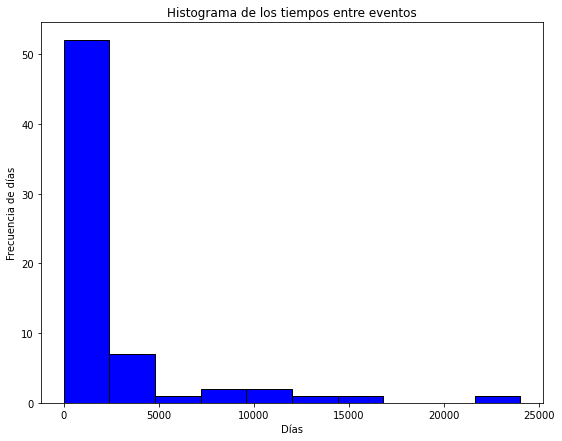

In [20]:
figsize(9, 7)

# Hacer histograma usando matplotlib, los bins deben ser enteros

plt.hist(dtpo2, color = 'blue', edgecolor = 'black')

# Agrega texto
plt.title('Histograma de los tiempos entre eventos')
plt.xlabel('Días'); plt.ylabel('Frecuencia de días');

(0.0, 2428.3880597014927)


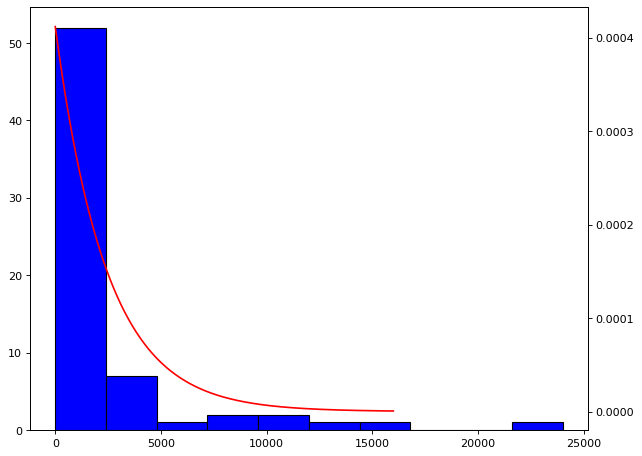

In [21]:
## ajuste de distribución exponencial considerando Estimadores de MV
fig, ax = plt.subplots(1, 1,figsize=(9,7), dpi=80)

ax.hist(dtpo2, color = 'blue', edgecolor = 'black')
ax2 = ax.twinx()
args = stats.expon.fit(dtpo2)
print(args)

vec = list(range(16000))

pvec = []
for i in vec:
    pvec.append(stats.expon.pdf(x=i,scale=args[1],loc=args[0]))
    
ax2.plot(vec,pvec, color='red')

plt.draw()

In [22]:
datos2 = stats.expon.rvs(*args,size=67)

stats.kstest(dtpo2, datos2)

KstestResult(statistic=0.29850746268656714, pvalue=0.004880224780459629)

#### Ejercicio 3: 
Considere los datos analizados en la sesión anterior y estudie la posibilidad de ajustarles alguna distribución de probabilidad conocida, incluyendo estimación de parámetros por máxima verosimilitud y  el test de ajuste de k-s respectivo.

In [153]:
#Definimos una funcion para que formatee la fecha de la forma 17-03-1575
def fechaFormat(datos):
    fecha = datos['Fecha (UTC)']
    L = []
    for i in fecha:
        anno=i[0:4]
        mes= i[5:7]
        dia=i[8:10]
        L.append(dia+"-"+mes+"-"+anno)
    return L


datosP3 = pd.read_csv("dataSismosAtacama.csv")
datosP3 = datosP3.sort_values(by='Fecha (UTC)')  #Lo ordenamos por fecha
datosP3 = datosP3.reset_index(inplace=False) #Arreglamos los index
datosP3 = datosP3.drop(['index'], axis=1)
a = fechaFormat(datosP3)
datosP3.insert(1,"Fecha_local",a,allow_duplicates=False)
datosP3 = datosP3.drop(['Fecha (UTC)'], axis=1)
#datosP3.head(20)

len(datosP3)



51

In [154]:
vec1 = datosP3['Fecha_local']
dtpo = []
ind = list(range(50))
for i in ind:
    fecha1 = datetime.strptime(vec1[i], '%d-%m-%Y')
    fecha2 = datetime.strptime(vec1[i+1], '%d-%m-%Y')
    num = fecha2-fecha1
    num = num/timedelta(days=1)
    dtpo.append(num)
    

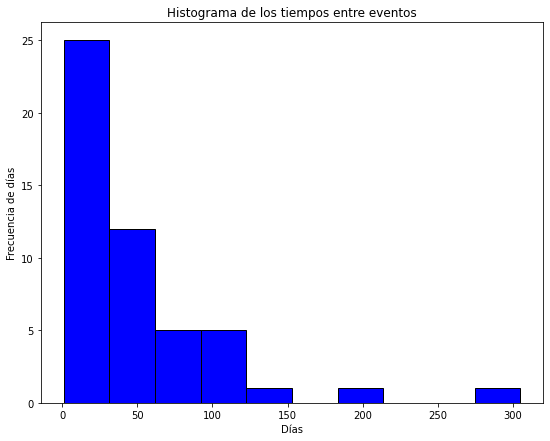

In [155]:
figsize(9, 7)

# Hacer histograma usando matplotlib, los bins deben ser enteros

plt.hist(dtpo, color = 'blue', edgecolor = 'black')

# Agrega texto
plt.title('Histograma de los tiempos entre eventos')
plt.xlabel('Días'); plt.ylabel('Frecuencia de días');

(1.0, 47.04)


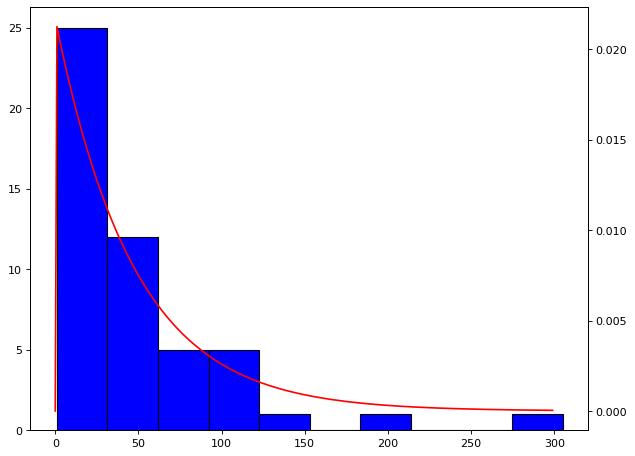

In [156]:
## ajuste de distribución exponencial considerando Estimadores de MV
fig, ax = plt.subplots(1, 1,figsize=(9,7), dpi=80)

ax.hist(dtpo, color = 'blue', edgecolor = 'black')
ax2 = ax.twinx()
args = stats.expon.fit(dtpo)
print(args)

vec = list(range(300))

pvec = []
for i in vec:
    pvec.append(stats.expon.pdf(x=i,scale=args[1],loc=args[0]))
    
ax2.plot(vec,pvec, color='red')

plt.draw()

In [158]:
datos2 = stats.expon.rvs(*args,size=50)

stats.kstest(dtpo, datos2)

KstestResult(statistic=0.12, pvalue=0.8692618870414056)

Grafico exponencial


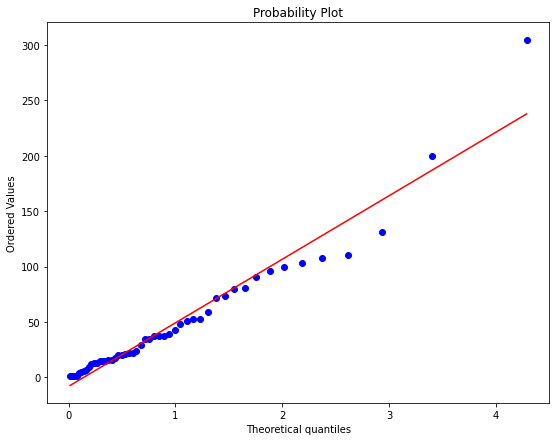

In [159]:
import pylab
stats.probplot(dtpo, dist="expon", plot=pylab)
print("Grafico exponencial")

R: Los valores muy probablemente representan una distribución exponencial, ya que el pvalue es muchísimo mayor a 0.05, así mismo, el valor del estadístico y los gráficos representados apuntan a esta respuesta.